In [1]:
using Plots, LaTeXStrings
pgfplotsx()
plot(rand(3),rand(3))
nothing

Exemplos:
- Integração Numérica
  - Simpsons
- Zeros de função

In [2]:
pgfplotsx(size=(800,600))
f(x) = sin(10x) * 0.3 + 0.5 + sin(4π * x) * 0.2

n = 16
x = range(0, 1, length=n)
xx = range(0, 1, length=2n-1)[2:2:end-1]

s(x, a, b) = begin
    h = (b - a) / 2
    f((a + b) / 2)
end
s(t) = begin
    i = max(min(findfirst(x .≥ t), n), 2)
    s(t, x[i-1], x[i])
end

plot(f, -0.025, 1.025, c=:white, lw=2, leg=false, axis=false, grid=false)
plot!(f, 0, 1, c=RGBA(0, 0, 1, 0.5), fill=0, lw=0)
plot!(s, 0, 1, c=RGBA(1, 1, 0, 0.5), fill=0)
plot!(s, 0, 1, c=RGBA(1, 1, 0))
scatter!(xx, f.(xx), c=:magenta, ms=3)
h = (xx[2] - xx[1]) / 2
for i = 1:n-1
    y = f(xx[i])
    plot!([x[i], x[i]], [0, y], c=RGBA(1, 1, 0))
end
plot!(background_color="#1893f8")
xlims!(-0.05, 1.05)
ylims!(0, 1)
png("integral-titulo")

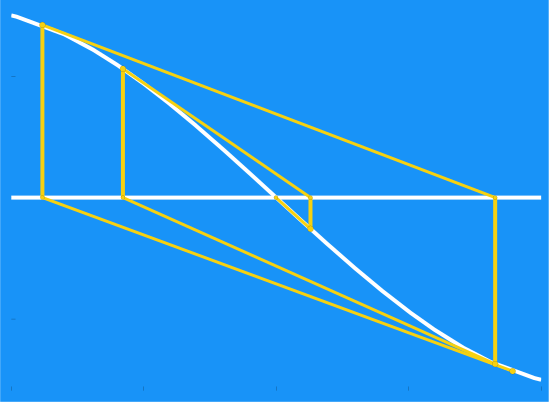

In [13]:
pgfplotsx(size=(800,600))
using ForwardDiff
f(x) = x^3 - x
g(x) = ForwardDiff.derivative(f, x)

l, u = -0.5, 0.5
p = plot([l, u], [0, 0], c=:white, axis=false, grid=false, axis_ratio=:equal, lw=4)
plot!(background_color="#1893f8")
plot!(f, l, u, leg=false, c=:white, lw=4)
a = sqrt(5) / 5 - 1e-3
for k = 1:5
    scatter!([a], [f(a)], c="#f6d110", m=(stroke(0),6))
    b = a - f(a) / g(a)
    plot!([a, b], [f(a), 0], c="#f6d110", lw=3)
    scatter!([b], [0], c="#f6d110", m=(stroke(0),4))
    plot!([b, b], [0, f(b)], c="#f6d110", lw=4)
    a = b
end
xticks!(-0.5:0.25:0.5)
yticks!(-0.5:0.25:0.5)
xlims!(l, u)
png("newton-titulo")
p

In [483]:
using LinearAlgebra, Random, SparseArrays
pgfplotsx(size=(200,200))

Random.seed!(0)
n = 20
A = sprand(n, n, 0.1)
A = A * A' + I
plot(background_color="#1893f8", axis=false, grid=false, leg=false)
scatter!(findnz(A[n:-1:1,:])[1:2], m=(:square,:white,3))
png("matrix-A-titulo")

In [484]:
pgfplotsx(size=(200,200))
F = cholesky(A)
G = sparse(F.L)
plot(background_color="#1893f8", axis=false, grid=false, leg=false)
scatter!(findnz(G[n:-1:1,:])[1:2], m=(:square,:white,3))
png("matrix-G-titulo")
plot(background_color="#1893f8", axis=false, grid=false, leg=false)
scatter!(findnz(G[:,n:-1:1])[1:2], m=(:square,:white,3))
png("matrix-Gt-titulo")

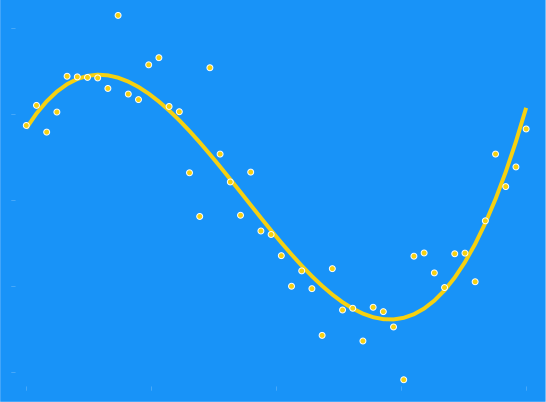

In [18]:
using Random, Statistics
pgfplotsx(size=(800,600))

Random.seed!(0)
n = 50
x = range(0, 1, length=n) 
y = cos.(2π * x) * 3 + sin.(2π * x) * 7 .+ 5 + randn(n) * 2
X = [ones(n) x x.^2 x.^3]
β = X \ y
ylin = X * β

p = plot(background_color="#1893f8", axis=false, grid=false, leg=false)
scatter!(x, y, m=(stroke(1,:white), 6, "#f6d110"), leg=false, axis=false, grid=false)
β = X \ y
ylin = X * β
plot!(x, ylin, c="#f6d110", lw=4)

png("ajuste-de-dados-titulo")
p

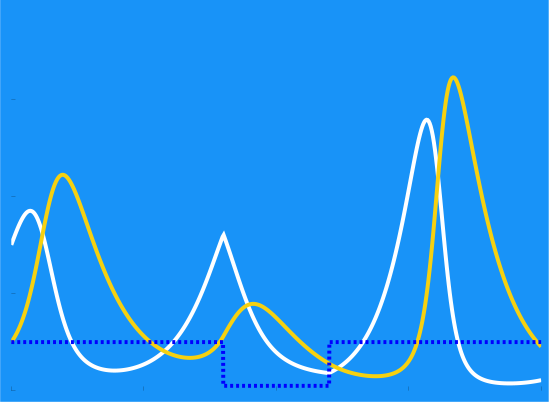

In [19]:
pgfplotsx(size=(800,600))
function runge_kutta(F, y0, t0, tf; n = 100)
    t = range(t0, tf, length=n)
    h = t[2] - t[1]
    m = length(y0)
    Y = zeros(m, n)
    Y[:,1] = y0
    for i = 1:n-1
        ti = t[i]
        yi = Y[:,i]
        k₁ = F(ti,yi)
        k₂ = F(ti + h / 2, yi + h / 2 * k₁)
        k₃ = F(ti + h / 2, yi + h / 2 * k₂)
        k₄ = F(ti + h, yi + h * k₃)
        Y[:,i+1] = yi + h * (k₁ + 2k₂ + 2k₃ + k₄) / 6
    end
    return t, Y
end

y0 = [3.0; 1.0]
t0 = 0.0
tf = 20.0
αf(t) = abs(t - 10) < 2 ? 0.1 : 1.0
β = 0.5
γ = 0.5
δ = 0.75
Fun(t, y) = [αf(t) * y[1] - β * y[1] * y[2]; γ * y[1] * y[2] - δ * y[2]]
t, Y = runge_kutta(Fun, y0, t0, tf, n=500)

N = length(t)
i = N
p = plot(leg=false)
plot!(p, background_color="#1893f8", axis=false, grid=false, leg=false)
xi, yi = Y[:,i]
plot!(p, t[1:i], Y[1,1:i], c=:white, lw=4)
plot!(p, t[1:i], Y[2,1:i], c="#f6d110", lw=4)
plot!(p, t -> αf(t), t0, tf, c=:blue, lw=4, l=:dash)
xlims!(p, 0, t[end])
ylims!(p, 0, maximum(Y) + 1.5)
png("presa-predador-titulo")
p

In [506]:
sin(2π / 3)

0.8660254037844387

In [580]:
pgfplotsx(size=(600,600))
# (a + bi)³ = a³ + 3a²bi - 3ab² - b³i
function iterate(x, y)
    F = [x^3 - 3x * y^2 - 1; 3x^2 * y - y^3]
    iter = 0
    while norm(F) > 1e-4
        G = [3x^2 - 3y^2   -6x * y;  6x * y  3x^2 - 3y^2]
        if rank(G) < 2
            return [x, y], -1
        end
        d = -G \ F
        x, y = x + d[1], y + d[2]
        F = [x^3 - 3x * y^2 - 1; 3x^2 * y - y^3]
        iter += 1
        iter > 10 && break
    end
    return [x, y], iter
end

n = 100
M = zeros(n, n)
r = [ [0.0; 1.0], [sin(2π / 3); -0.5], [-sin(2π / 3); -0.5] ]
L = 1.2

gg = range(-L, L, length=n)
for i = 1:n, j = 1:n
    p, iter = iterate(gg[i], gg[j])
    k = argmin([norm(p - r[k]) for k = 1:3])
    M[i,j] = norm(p - r[k]) < 1 ? k : 0
end

plot(leg=false, background_color="#1893f8", axis=false, grid=false)
for (k,c) in zip(0:3, [:black, "#0927eb", "#f6d110", :white])
    I = findall(M .== k)
    scatter!(getindex.(I, 1), getindex.(I, 2), m=(c,stroke(0,c),:circle,4))
end
plot!()
png("fractal-newton-titulo")

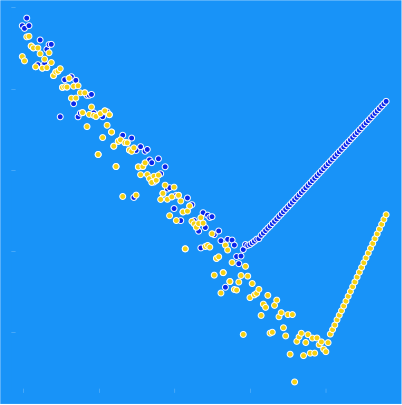

In [25]:
pgfplotsx(size=(600,600))

valores_h = [2.0^p for p in range(-50, -10, length=164)]

p = plot(leg=false, xaxis=:log, yaxis=:log, background_color="#1893f8", axis=false, grid=false)

D = [abs((exp(1 + h) - exp(1)) / h - exp(1)) for h in valores_h]
scatter!(valores_h, D, m=(6,stroke(1,:white),"#0927eb"))

D = [abs((exp(1 + h) - exp(1 - h)) / 2h - exp(1)) for h in valores_h]
scatter!(valores_h, D, m=(6,stroke(1,:white),"#f6d110"))

png("aprox-deriv-titulo")
p

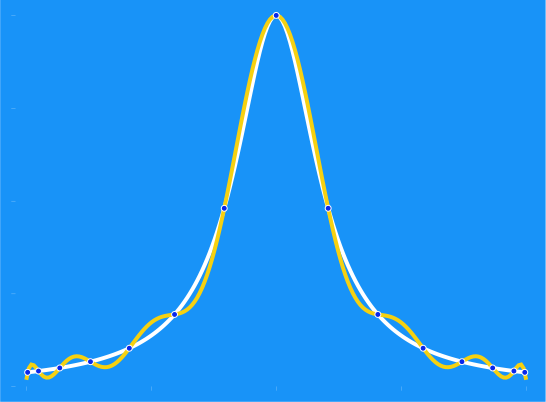

In [28]:
pgfplotsx(size=(800,600))
n = 15
#x = range(-1, 1, length=n)
x = cos.((2 * (1:n) .- 1) * π / 2n)
y = 1 ./ (1 .+ 25x.^2)
β = [x[i]^j for i = 1:n, j = 0:n-1] \ y
xg = range(-1, 1, length=200)
yhat = [xgi^j for xgi in xg, j = 0:n-1] * β
p = scatter(x, y, ms=6, c="#0927eb", background_color="#1893f8", axis=false, leg=false, grid=false)
plot!(xg, 1 ./ (1 .+ 25xg.^2), c=:white, lw=4)
plot!(xg, yhat, c="#f6d110", lw=4)
png("interpolacao-titulo")
p